## Mount the Google Drive onto the Colab as the storage location.

Following the instructions returned from the below cell. You will click a web link and select the google account you want to mount, then copy the authorication code to the blank, press enter.

In [1]:
# This must be run within a Google Colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Append the directory location where you upload the start code folder (In this problem, *RLalgs*) to the sys.path

E.g. dir = '/content/drive/My Drive/RL/.', start code folder is inside "RL" folder.

In [2]:
import sys
# sys.path.append('/content/gdrive/My Drive/RL/.')
sys.path.append('/content/gdrive/My Drive/08-RL_HW3')

In [3]:
!ls /content/gdrive/My\ Drive/08-RL_HW3

CodingAssignment.pdf  FrozenLake.ipynb	gym-tutorial.ipynb  RLalgs  sarsa.py


In [4]:
import RLalgs

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [5]:
# %load_ext autoreload
# %autoreload 2

In [6]:
import importlib, RLalgs
importlib.reload(RLalgs)


RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


<module 'RLalgs' from '/content/gdrive/My Drive/08-RL_HW3/RLalgs/__init__.py'>

In [7]:
# !pip install gymnasium

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gymnasium as gym


## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />


In [9]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)

    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step - 1], 1/step, r)
    q_f[step] = estimate(q_f[step - 1], FixedStepSize, r)
    # YOUR CODE ENDS HERE
    ############################

q_h = q_h[1:]
q_f = q_f[1:]

Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />

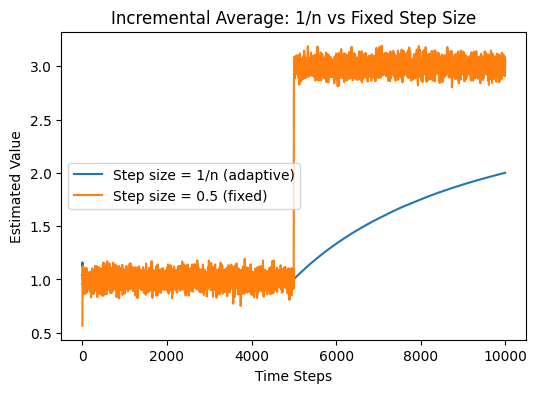

In [10]:
############################
# YOUR CODE STARTS HERE
plt.figure(figsize=(6,4))
plt.plot(q_h, label='Step size = 1/n (adaptive)')
plt.plot(q_f, label=f'Step size = {FixedStepSize} (fixed)')
plt.title('Incremental Average: 1/n vs Fixed Step Size')
plt.xlabel('Time Steps')
plt.ylabel('Estimated Value')
plt.legend()

# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />


In [11]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q, e=0.0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q, e=0.1) #Use epsilon = 0.1
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment

In [12]:
env = gym.make('FrozenLake-v1')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />

In [29]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
#q = action_evaluation(env = env.env, gamma = 1, v = v)
q = action_evaluation(env = env.unwrapped, gamma=1, v=v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [0.66666667 0.66666667 0.66666667 1.        ]
 [1.         1.         1.         1.        ]
 [0.66666667 0.66666667 0.66666667 1.        ]
 [1.         0.66666667 0.66666667 0.66666667]
 [0.         0.         0.         0.        ]
 [0.66666667 0.33333333 0.66666667 0.33333333]
 [0.         0.         0.         0.        ]
 [0.66666667 0.66666667 0.66666667 1.        ]
 [0.66666667 1.         0.66666667 0.66666667]
 [1.         0.66666667 0.66666667 0.66666667]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.66666667 0.66666667 1.         0.66666667]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [14]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />

In [15]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations to converge = 8


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

#Uncommented

In [16]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
# Q = action_evaluation(env=env.unwrapped, gamma=1, v=V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

/usr/local/lib/python3.12/dist-packages/gymnasium/envs/toy_text/frozen_lake.py:353: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode ends. Reward = 1


### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />

In [17]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352773 0.82352718 0.8235268  0.8235266  0.8235279  0.
 0.52941062 0.         0.82352816 0.8235285  0.76470509 0.
 0.         0.88235231 0.94117615 0.        ]
Number of iterations to converge = 389


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

#Uncommented

In [18]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

Episode ends. Reward = 1


### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />

In [19]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[9.00175991e-02 7.60183345e-02 7.29831463e-02 5.87327144e-02]
 [2.47524322e-02 9.45953038e-03 1.58445960e-02 9.89895773e-02]
 [1.22101489e-01 4.00160719e-02 5.66010038e-02 5.42754725e-02]
 [3.92741530e-02 2.00720223e-02 6.11230119e-04 1.50552568e-02]
 [8.41088223e-02 5.52245637e-02 2.22463858e-02 3.81137129e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.21513801e-01 6.49501775e-02 2.01312269e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.48404286e-02 7.04945345e-02 5.34573875e-02 3.66515966e-02]
 [1.37007537e-01 1.12972072e-01 9.15034240e-02 4.75158506e-02]
 [3.69097416e-01 1.60450519e-01 7.21360814e-02 1.55074705e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.07603568e-01 3.19216383e-01 1.43475319e-01 4.54055594e-02]
 [1.24368470e-01 6.86285896e-01 3.59464540e-01 4.87039640e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

Generally, you should get non-zero action values on non-terminal states.

# Uncommented

In [56]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
# env = gym.make('FrozenLake-v1')
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

Episode ends. Reward = 1


### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />

In [21]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[3.70866071e-02 1.70981772e-02 2.00414674e-02 1.70420420e-02]
 [1.27989911e-02 1.21220515e-02 9.48677450e-03 5.17615992e-02]
 [6.14795162e-02 2.87835252e-02 3.79350113e-02 2.15022318e-02]
 [3.05997117e-02 0.00000000e+00 5.13566408e-03 4.08981112e-04]
 [1.56006834e-02 4.66621393e-02 1.59666654e-02 2.46770082e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.56983957e-02 5.31555220e-02 1.20751698e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94923022e-02 8.65897608e-02 5.17223302e-02 5.26718431e-02]
 [8.44967871e-02 1.81660324e-01 1.02786848e-01 6.06194783e-02]
 [2.02372007e-01 1.16972398e-01 1.35468501e-01 5.35303886e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.46382647e-02 9.60238659e-02 1.49238137e-01 3.02780394e-01]
 [1.82033193e-01 7.51321834e-01 3.00821760e-01 4.52789465e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

In [22]:
policy = np.argmax(Q, axis=1)
print(policy.reshape(4, 4))

[[0 3 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [0 3 1 0]]


Generally, you should get non-zero action values on non-terminal states.

# Uncommented

In [44]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
# env = gym.make('FrozenLake-v1')
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

Episode ends. Reward = 1


### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [24]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
# env = gym.make('FrozenLake-v1')
# human_play(env)

Action indices: LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
Give the environment your action index:1
Give the environment your action index:2
Give the environment your action index:0


## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in [Chapter 2.3](http://incompleteideas.net/book/RLbook2020.pdf).<br />

In [25]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE
# Experiment parameters
arms = 10
steps = 1000
runs = 2000
epsilons = [0, 0.01, 0.1]

avg_rewards = np.zeros((len(epsilons), steps))
for idx, eps in enumerate(epsilons):
    # Accumulate total reward for each time step across all runs
    total_reward = np.zeros(steps)
    for run in range(runs):
        # Initialize true reward means for this run (one for each arm)
        true_means = np.random.normal(0, 1, size=arms)
        # Initialize Q estimates and counters
        Q_est = np.zeros(arms)
        counts = np.zeros(arms, dtype=int)
        for t in range(steps):
            # Epsilon-greedy action selection
            if np.random.rand() < eps:
                action = np.random.randint(arms)         # explore
            else:
                # exploit (greedy): choose argmax Q (break ties randomly)
                best_value = np.max(Q_est)
                best_actions = np.where(Q_est == best_value)[0]
                action = np.random.choice(best_actions)
            # Simulate reward for selected action
            reward = np.random.normal(loc=true_means[action], scale=1.0)
            # Update counts and Q_estimate for the action
            counts[action] += 1
            # Incremental update (sample average method)
            Q_est[action] += (reward - Q_est[action]) / counts[action]
            # Add reward to total_reward for this time step
            total_reward[t] += reward
    # Average reward at each time step for this epsilon
    avg_rewards[idx] = total_reward / runs

# YOUR CODE ENDS HERE
############################

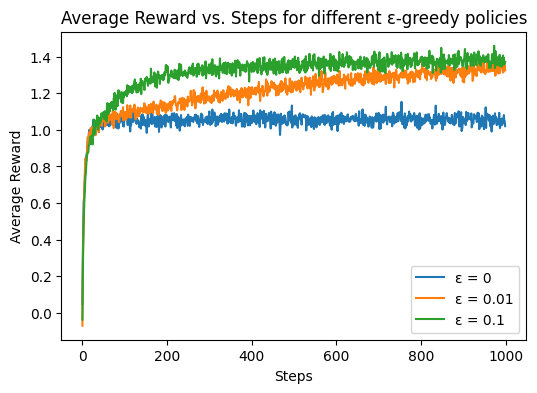

In [26]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE
# Plot the average reward over time for each epsilon
plt.figure(figsize=(6,4))
for idx, eps in enumerate(epsilons):
    plt.plot(avg_rewards[idx], label=f'ε = {eps}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps for different ε-greedy policies')
plt.legend()

# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.